# DATASETS & DATALOADERS

编程处理数据时非常繁琐而且难以去维护；理想情况下，为了可读性和模块化我们的数据代码和我们的模型训练代码是解耦合的。PyTorch 提供了两个预加载数据的原语：`torch.utils.data.DataLoader` 和 `torch.utils.data.Dataset` 。`Dataset` 存储了数据和他们对应的标签，而 `DataLoader` 在 `Dataset` 上包了一层迭代器能够帮助我们轻易去处理数据。

## 加载数据集

这里使用 TorchVision 的 [Fashion-MNIST](https://research.zalando.com/project/fashion_mnist/fashion_mnist/) 数据集。Fashion-MNIST 是 Zalando 的文章图片数据集，包含 60,000 条训练数据和 10,000 条测试数据。每一个样例包含一个 28 * 28 的灰度图像以及对应的类型。

加载数据集的方法有四个参数：
- `root` 训练/测试数据的存储路径
- `train` 声明训练/测试数据集
- `download=True` 当 `root` 参数不可用时从网络上下载数据
- `transform` 和 `target_transform` 指定特征和标签的转换

In [7]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

## 遍历和可视化数据

我们可以像列表一样索引 `Datasets`: `training_data[index]`。我们使用 `matplotlib` 去可视化训练数据

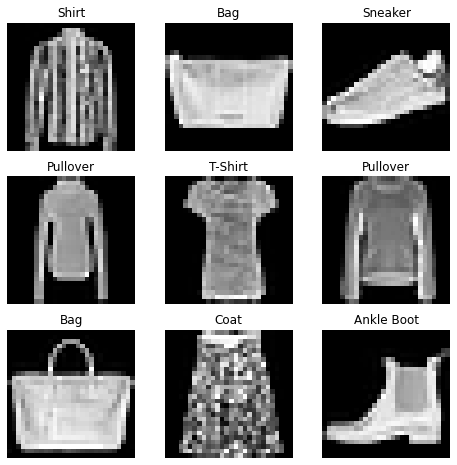

In [3]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

## 从你的文件中创建一个自定义 Dataset 类

一个自定义数据集类必须实现三个函数：__init__, __len__ 和 __getitem__。

在下面的部分，我们会拆解每一个函数的内部实现。

In [4]:
import os 
import pandas as pd
from torchvision.io import read_image

class CustomImageDataset(Dataset):
    def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
        self.img_labels = pd.read_csv(annotations_file)
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform
        
    def __len(self):
        return len(self.img_labels)
    
    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        image = read_image(img_path)
        label = self.img_labels.iloc[idx, 1]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label

ImportError: cannot import name 'read_image'

## 通过 DataLoaders 准备训练所用数据

数据集每次检索数据集的特征并标记一个样本。在训练模型时，我们通常希望“小批量”地传递样本，在每个时期重新洗洗数据以减少模型过拟合，并使用Python的多处理来加速数据检索。

DataLoader是一个可迭代对象，它用一个简单的API为我们抽象了这种复杂性。

In [9]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

## 迭代遍历 DataLoader

我们已经将该数据集加载到DataLoader中，并可以根据需要遍历该数据集。下面的每次迭代都返回一批train_features和train_labels(分别包含batch_size=64个feature和label)。因为我们指定了shuffle=True，在我们遍历所有批次后，数据被shuffle(对于数据加载顺序的细粒度控制，请查看sampler)。

Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


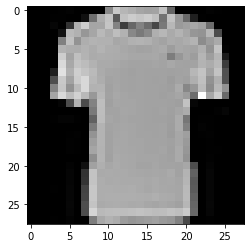

Label: 0


In [10]:
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")

In [16]:
train_features[0].squeeze().shape

torch.Size([28, 28])